In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import io
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf

In [3]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [4]:
# Factors
path_dataset_3d='Tensor_decom_sample/data_3month/factors_folder_3mo/'

In [5]:
factor_2 = pd.read_csv(path_dataset_3d + "2.csv")

In [6]:
factor_2.shape

(2175, 36)

In [7]:
factor_2.set_index(factor_2.columns[0], inplace=True)
factor_2.shape

(2175, 35)

In [8]:
# Load features data
path_features = 'Tensor_decom_sample/data/'

In [9]:
weather_data = pd.read_csv(path_features + 'final_weather_3month.csv')
weather_data.set_index(weather_data.columns[0],inplace=True)

In [10]:
weather_data.head()

,timestamp,temperature,precipitation,rainfall,snowfall,cloudcover,wind_speed,wind_direction,date,sunrise_datetime,...,event_start_date,event_end_date,event_location,event_latitude,event_longitude,elisabeth_line,lockdown,school_holidays,strike,weekday
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2023-01-02 00:00:00,8.1,0.4,0.4,0.0,100,6.6,248,1/2/2023,1/2/2023 9:06,...,1/2/2023,1/2/2023,Hyde Park,51.507388,-0.165571,True,False,winter_half_term,NaN,0
1,2023-01-02 01:00:00,7.8,0.3,0.3,0.0,100,7.2,233,1/2/2023,1/2/2023 9:06,...,1/2/2023,1/2/2023,Hyde Park,51.507388,-0.165571,True,False,winter_half_term,NaN,0
2,2023-01-02 02:00:00,7.5,0.1,0.1,0.0,100,10.4,224,1/2/2023,1/2/2023 9:06,...,1/2/2023,1/2/2023,Hyde Park,51.507388,-0.165571,True,False,winter_half_term,NaN,0
3,2023-01-02 03:00:00,7.3,0.0,0.0,0.0,95,13.6,220,1/2/2023,1/2/2023 9:06,...,1/2/2023,1/2/2023,Hyde Park,51.507388,-0.165571,True,False,winter_half_term,NaN,0
4,2023-01-02 04:00:00,7.1,0.0,0.0,0.0,100,13.8,219,1/2/2023,1/2/2023 9:06,...,1/2/2023,1/2/2023,Hyde Park,51.507388,-0.165571,True,False,winter_half_term,NaN,0


In [11]:
weather_data.dtypes

timestamp            object
temperature         float64
precipitation       float64
rainfall            float64
snowfall            float64
cloudcover            int64
wind_speed          float64
wind_direction        int64
date                 object
sunrise_datetime     object
sunset_datetime      object
encoding             object
event_title          object
event_start_date     object
event_end_date       object
event_location       object
event_latitude      float64
event_longitude     float64
elisabeth_line         bool
lockdown               bool
school_holidays      object
strike               object
weekday               int64
dtype: object

In [12]:
#Cleaning Data
weather_data.drop(columns=['date','sunrise_datetime','sunset_datetime','event_start_date','event_end_date'], inplace=True)
weather_data.rename(columns={'encoding':'daylight'}, inplace=True)

In [13]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        2175 non-null   object 
 1   temperature      2175 non-null   float64
 2   precipitation    2175 non-null   float64
 3   rainfall         2175 non-null   float64
 4   snowfall         2175 non-null   float64
 5   cloudcover       2175 non-null   int64  
 6   wind_speed       2175 non-null   float64
 7   wind_direction   2175 non-null   int64  
 8   daylight         2175 non-null   object 
 9   event_title      24 non-null     object 
 10  event_location   24 non-null     object 
 11  event_latitude   24 non-null     float64
 12  event_longitude  24 non-null     float64
 13  elisabeth_line   2175 non-null   bool   
 14  lockdown         2175 non-null   bool   
 15  school_holidays  285 non-null    object 
 16  strike           360 non-null    object 
 17  weekday       

In [14]:
weather_data['timestamp'] = weather_data['timestamp'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [15]:
weather_data['month'] = weather_data['timestamp'].apply(lambda x: x.month)
weather_data['hour'] = weather_data['timestamp'].apply(lambda x: x.hour)

In [16]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        2175 non-null   datetime64[ns]
 1   temperature      2175 non-null   float64       
 2   precipitation    2175 non-null   float64       
 3   rainfall         2175 non-null   float64       
 4   snowfall         2175 non-null   float64       
 5   cloudcover       2175 non-null   int64         
 6   wind_speed       2175 non-null   float64       
 7   wind_direction   2175 non-null   int64         
 8   daylight         2175 non-null   object        
 9   event_title      24 non-null     object        
 10  event_location   24 non-null     object        
 11  event_latitude   24 non-null     float64       
 12  event_longitude  24 non-null     float64       
 13  elisabeth_line   2175 non-null   bool          
 14  lockdown         2175 non-null   bool   

In [17]:
#Dropping lat & lon as of now
features = weather_data.drop(columns=['timestamp','event_latitude','event_longitude'])

In [18]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      2175 non-null   float64
 1   precipitation    2175 non-null   float64
 2   rainfall         2175 non-null   float64
 3   snowfall         2175 non-null   float64
 4   cloudcover       2175 non-null   int64  
 5   wind_speed       2175 non-null   float64
 6   wind_direction   2175 non-null   int64  
 7   daylight         2175 non-null   object 
 8   event_title      24 non-null     object 
 9   event_location   24 non-null     object 
 10  elisabeth_line   2175 non-null   bool   
 11  lockdown         2175 non-null   bool   
 12  school_holidays  285 non-null    object 
 13  strike           360 non-null    object 
 14  weekday          2175 non-null   int64  
 15  month            2175 non-null   int64  
 16  hour             2175 non-null   int64  
dtypes: bool(2), fl

In [19]:
#Filling NA values
features['event_title'] = features['event_title'].fillna('No_Event')
features['event_location'] = features['event_location'].fillna('No_Location')
features['school_holidays'] = features['school_holidays'].fillna('school_term')
features['strike'] = features['strike'].fillna('no_strike')

In [20]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      2175 non-null   float64
 1   precipitation    2175 non-null   float64
 2   rainfall         2175 non-null   float64
 3   snowfall         2175 non-null   float64
 4   cloudcover       2175 non-null   int64  
 5   wind_speed       2175 non-null   float64
 6   wind_direction   2175 non-null   int64  
 7   daylight         2175 non-null   object 
 8   event_title      2175 non-null   object 
 9   event_location   2175 non-null   object 
 10  elisabeth_line   2175 non-null   bool   
 11  lockdown         2175 non-null   bool   
 12  school_holidays  2175 non-null   object 
 13  strike           2175 non-null   object 
 14  weekday          2175 non-null   int64  
 15  month            2175 non-null   int64  
 16  hour             2175 non-null   int64  
dtypes: bool(2), fl

In [21]:
# Scaling
from sklearn.preprocessing import StandardScaler

In [22]:
columns_scaling = ['temperature', 'precipitation', 'rainfall', 'snowfall', 'cloudcover','wind_speed', 'wind_direction']
scaler = StandardScaler()
scaler.fit(features[columns_scaling])
features[columns_scaling] = scaler.transform(features[columns_scaling])

In [23]:
features.head()

,temperature,precipitation,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daylight,event_title,event_location,elisabeth_line,lockdown,school_holidays,strike,weekday,month,hour
Unnamed: 0,,,,,,,,,,,,,,,,,
0,0.516812,1.402752,1.490698,-0.087814,0.959138,-1.177432,0.457910,nighttime,Winter Wonderland,Hyde Park,True,False,winter_half_term,no_strike,0,1,0
1,0.441843,0.964707,1.030606,-0.087814,0.959138,-1.101724,0.302944,nighttime,Winter Wonderland,Hyde Park,True,False,winter_half_term,no_strike,0,1,1
2,0.366873,0.088616,0.110422,-0.087814,0.959138,-0.697947,0.209965,nighttime,Winter Wonderland,Hyde Park,True,False,winter_half_term,no_strike,0,1,2
3,0.316894,-0.349429,-0.349670,-0.087814,0.818127,-0.294171,0.168641,nighttime,Winter Wonderland,Hyde Park,True,False,winter_half_term,no_strike,0,1,3
4,0.266914,-0.349429,-0.349670,-0.087814,0.959138,-0.268935,0.158309,nighttime,Winter Wonderland,Hyde Park,True,False,winter_half_term,no_strike,0,1,4


In [24]:
# Encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [25]:
#Columns
columns_ordinal_encoding = ["daylight",'lockdown','elisabeth_line']
# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder()
# Fit it
ordinal_encoder.fit(features[columns_ordinal_encoding])
features[columns_ordinal_encoding] = ordinal_encoder.transform(features[columns_ordinal_encoding])

In [26]:
features.head()

,temperature,precipitation,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daylight,event_title,event_location,elisabeth_line,lockdown,school_holidays,strike,weekday,month,hour
Unnamed: 0,,,,,,,,,,,,,,,,,
0,0.516812,1.402752,1.490698,-0.087814,0.959138,-1.177432,0.457910,1.0,Winter Wonderland,Hyde Park,0.0,0.0,winter_half_term,no_strike,0,1,0
1,0.441843,0.964707,1.030606,-0.087814,0.959138,-1.101724,0.302944,1.0,Winter Wonderland,Hyde Park,0.0,0.0,winter_half_term,no_strike,0,1,1
2,0.366873,0.088616,0.110422,-0.087814,0.959138,-0.697947,0.209965,1.0,Winter Wonderland,Hyde Park,0.0,0.0,winter_half_term,no_strike,0,1,2
3,0.316894,-0.349429,-0.349670,-0.087814,0.818127,-0.294171,0.168641,1.0,Winter Wonderland,Hyde Park,0.0,0.0,winter_half_term,no_strike,0,1,3
4,0.266914,-0.349429,-0.349670,-0.087814,0.959138,-0.268935,0.158309,1.0,Winter Wonderland,Hyde Park,0.0,0.0,winter_half_term,no_strike,0,1,4


In [27]:
#Columns
columns_onehot_encoding = ['event_title','event_location','school_holidays','strike']
# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse = False)
# Fit encoder
ohe.fit(features[['event_title']])
features[ohe.get_feature_names_out()] = ohe.transform(features[['event_title']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse = False)
# Fit encoder
ohe.fit(features[['event_location']])
features[ohe.get_feature_names_out()] = ohe.transform(features[['event_location']])

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse = False)
# Fit encoder
ohe.fit(features[['school_holidays']])
features[ohe.get_feature_names_out()] = ohe.transform(features[['school_holidays']])

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse = False)
# Fit encoder
ohe.fit(features[['strike']])
features[ohe.get_feature_names_out()] = ohe.transform(features[['strike']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   temperature                       2175 non-null   float64
 1   precipitation                     2175 non-null   float64
 2   rainfall                          2175 non-null   float64
 3   snowfall                          2175 non-null   float64
 4   cloudcover                        2175 non-null   float64
 5   wind_speed                        2175 non-null   float64
 6   wind_direction                    2175 non-null   float64
 7   daylight                          2175 non-null   float64
 8   event_title                       2175 non-null   object 
 9   event_location                    2175 non-null   object 
 10  elisabeth_line                    2175 non-null   float64
 11  lockdown                          2175 non-null   float64
 12  school

In [30]:
final_features = features.drop(columns=columns_onehot_encoding)

In [31]:
final_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   temperature                       2175 non-null   float64
 1   precipitation                     2175 non-null   float64
 2   rainfall                          2175 non-null   float64
 3   snowfall                          2175 non-null   float64
 4   cloudcover                        2175 non-null   float64
 5   wind_speed                        2175 non-null   float64
 6   wind_direction                    2175 non-null   float64
 7   daylight                          2175 non-null   float64
 8   elisabeth_line                    2175 non-null   float64
 9   lockdown                          2175 non-null   float64
 10  weekday                           2175 non-null   int64  
 11  month                             2175 non-null   int64  
 12  hour  

In [32]:
final_features.drop(columns=['strike_no_strike'], inplace=True)

In [34]:
final_features.drop(columns=['event_title_No_Event'], inplace=True)

In [36]:
final_features.drop(columns=['event_location_No_Location'], inplace=True)

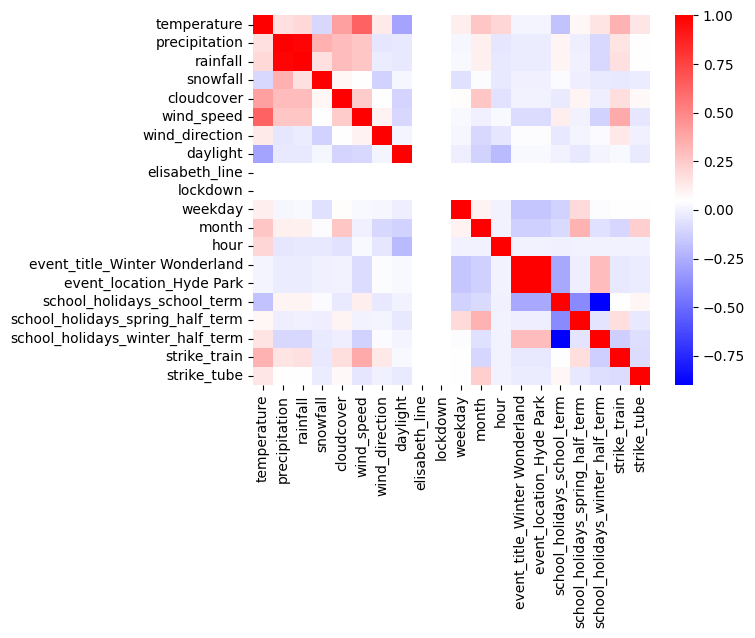

In [37]:
# Heatmap of pairwise correlations
correlation_matrix = final_features.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [47]:
final_features.shape

(2175, 23)

In [48]:
factor_2.shape

(2175, 35)

In [49]:
y = factor_2

In [50]:
y.shape

(2175, 35)

In [51]:
X = final_features

In [52]:
X.shape

(2175, 23)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [54]:
X_train =  X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test =  y_test.to_numpy()

In [55]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [56]:
# 0- Imports
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten

In [57]:
# 1- RNN Architecture
model = Sequential()
model.add(layers.LSTM(units=1000, activation='tanh',input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(layers.Dense(800))
model.add(layers.Dense(600))
model.add(layers.Dense(450))
model.add(layers.Dense(230))
model.add(layers.Dense(90))
model.add(layers.Dense(35, activation="linear"))

In [58]:
# 2- Compilation
model.compile(loss='mae',
              optimizer=Adam(learning_rate=0.01),metrics=['accuracy']) # very high lr so we can converge with such a small dataset

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, restore_best_weights=True)

# 3- Fit
history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.2,callbacks=[es])

Epoch 1/50
44/44 [==============================] - 10s 133ms/step - loss: 19.1043 - accuracy: 0.0323 - val_loss: 0.9484 - val_accuracy: 0.0172
Epoch 2/50
44/44 [==============================] - 7s 161ms/step - loss: 0.2972 - accuracy: 0.0244 - val_loss: 0.1730 - val_accuracy: 0.0259
Epoch 3/50
44/44 [==============================] - 6s 142ms/step - loss: 0.0662 - accuracy: 0.0244 - val_loss: 0.0422 - val_accuracy: 0.0374
Epoch 4/50
44/44 [==============================] - 7s 155ms/step - loss: 0.0519 - accuracy: 0.0330 - val_loss: 0.0544 - val_accuracy: 0.0431
Epoch 5/50
44/44 [==============================] - 6s 130ms/step - loss: 0.0392 - accuracy: 0.0216 - val_loss: 0.0294 - val_accuracy: 0.0402
Epoch 6/50
44/44 [==============================] - 5s 112ms/step - loss: 0.0404 - accuracy: 0.0280 - val_loss: 0.0301 - val_accuracy: 0.0115
Epoch 7/50
44/44 [==============================] - 7s 153ms/step - loss: 0.0256 - accuracy: 0.0251 - val_loss: 0.0403 - val_accuracy: 0.0172
Epoc

In [60]:
# 4- Predict
model.evaluate(X_test,y_test)

14/14 [==============================] - 0s 21ms/step - loss: 0.0173 - accuracy: 0.0483


[0.01733575202524662, 0.04827586188912392]

In [61]:
from matplotlib import pyplot

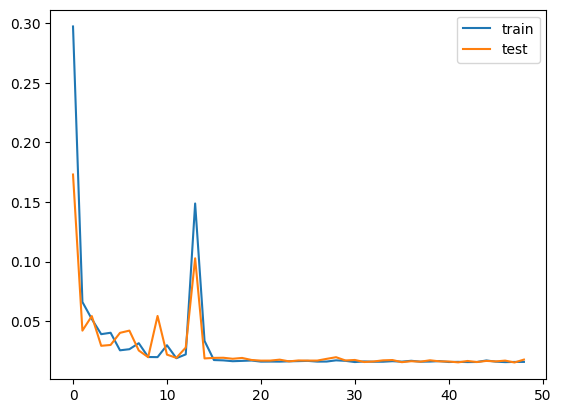

In [62]:
# plot history
pyplot.plot(history.history['loss'][1:], label='train')
pyplot.plot(history.history['val_loss'][1:], label='test')
pyplot.legend()
pyplot.show()